In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [55]:
# Read the csv file
df = pd.read_csv("data/diagnosis.csv")
df.head()

,ID number,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [56]:
df.columns

Index(['ID number', 'Diagnosis', 'Radius mean', 'Texture mean',
       'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean',
       'Concavity mean', 'Concave Points mean', 'Symmetry mean',
       'Fractal Dimension mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
       'Radius worst', 'Texture worst', 'Perimeter worst', 'Area worst',
       'Smoothness worst', 'Compactness worst', 'Concavity worst',
       'Concave Points worst', 'Symmetry worst', 'Fractal Dimension worst'],
      dtype='object')

In [57]:
# Prepare target data
target = df["Diagnosis"]
target_names = ["malignant", "benigh"]
target = target.map({'M': 1, 'B': 0})
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [58]:
# Prepare feature data
data = df.drop(["ID number", "Diagnosis"], axis=1)
feature_names = data.columns
data.head()

,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,Symmetry mean,Fractal Dimension mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


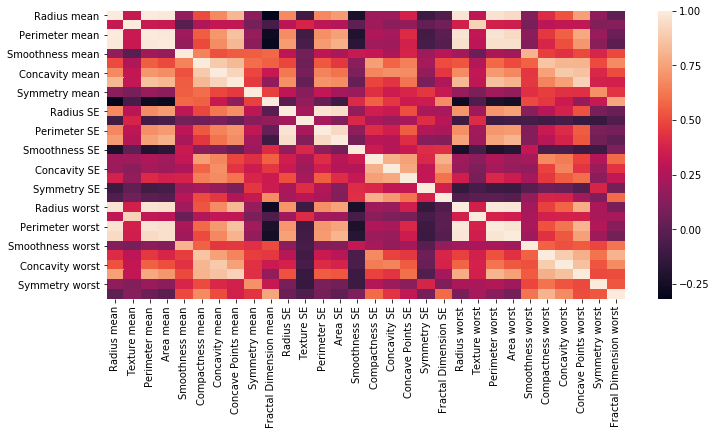

In [10]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
sns.heatmap(corr)

In [59]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [60]:
X_train.shape, X_test.shape

((426, 30), (142, 30))

In [61]:
clf = RandomForestClassifier(max_features=8,random_state=0)
clf.fit(X_train,y_train)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of Random Forest Classifier on training data: 1.00
Accuracy of Random Forest Classifier on testing data: 0.95


In [62]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

### Remove constant features

In [63]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


((426, 30), (142, 30))

### Remove duplicated features

In [64]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20


0

In [65]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((426, 30), (142, 30))

In [66]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### Remove correlated features

In [67]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

correlated features:  10


In [68]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((426, 20), (142, 20))

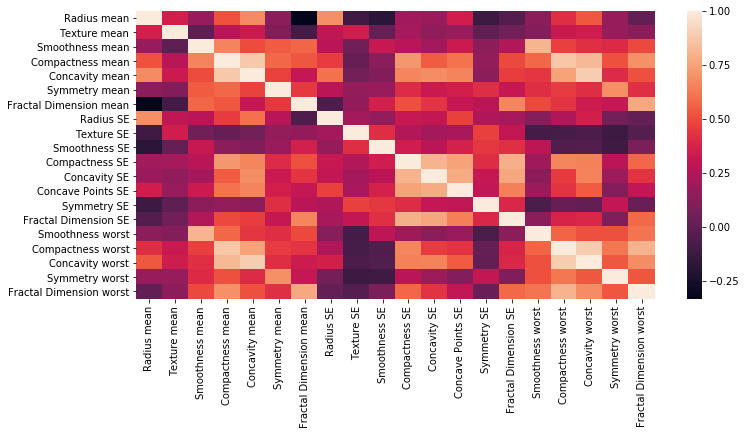

In [73]:
corr_filtered = X_train.corr()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
sns.heatmap(corr_filtered)

In [69]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [70]:
column = X_train.columns
column

Index(['Radius mean', 'Texture mean', 'Smoothness mean', 'Compactness mean',
       'Concavity mean', 'Symmetry mean', 'Fractal Dimension mean',
       'Radius SE', 'Texture SE', 'Smoothness SE', 'Compactness SE',
       'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Smoothness worst', 'Compactness worst',
       'Concavity worst', 'Symmetry worst', 'Fractal Dimension worst'],
      dtype='object')

In [71]:
new1 = df[column]
selected_diagnosis_3 = pd.concat([new1, df["Diagnosis"]], axis=1)
selected_diagnosis_3.head()

,Radius mean,Texture mean,Smoothness mean,Compactness mean,Concavity mean,Symmetry mean,Fractal Dimension mean,Radius SE,Texture SE,Smoothness SE,...,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Smoothness worst,Compactness worst,Concavity worst,Symmetry worst,Fractal Dimension worst,Diagnosis
0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,M
1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,M
2,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,M
3,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,M
4,12.45,15.70,0.12780,0.17000,0.1578,0.2087,0.07613,0.3345,0.8902,0.007510,...,0.03672,0.01137,0.02165,0.005082,0.1791,0.5249,0.5355,0.3985,0.12440,M


In [72]:
selected_diagnosis_3.to_csv("selected_diagnosis_3.csv", index=False)